In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 2: Load dataset (replace with your file path)
df = pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\data analytics\superstore-sales-dataset-2.csv", encoding="latin-1")

In [5]:
# Step 3: Basic Dataset Info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Dataset Shape: (9994, 20)
Columns: Index(['ï»¿Row ID', 'Order Date', 'Year', 'Month', 'Ship Date',
       'Delivery Time', 'Ship Mode', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
   ï»¿Row ID  Order Date  Year Month   Ship Date  Delivery Time  \
0          1  09-11-2013  2013   Nov  12-11-2013              3   
1          2  09-11-2013  2013   Nov  12-11-2013              3   
2          3  13-06-2013  2013   Jun  17-06-2013              4   
3          4  11-10-2012  2012   Oct  18-10-2012              7   
4          5  11-10-2012  2012   Oct  18-10-2012              7   

        Ship Mode    Customer Name    Segment        Country             City  \
0    Second Class      Claire Gute   Consumer  United States        Henderson   
1    Second Class      Claire Gute   Consumer  United States        Henderson   
2    Second Class  Darrin Va

In [10]:
# Convert with dayfirst=True
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, errors="coerce")

In [11]:
print(df[["Order Date", "Ship Date"]].head())

  Order Date  Ship Date
0 2013-11-09 2013-11-12
1 2013-11-09 2013-11-12
2 2013-06-13 2013-06-17
3 2012-10-11 2012-10-18
4 2012-10-11 2012-10-18


In [12]:
# Step 5: Delivery Time (already given, but check if correct)
df["Calculated Delivery Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
print("\nCheck Delivery Time calculation vs given column:")
print(df[["Delivery Time","Calculated Delivery Time"]].head())



Check Delivery Time calculation vs given column:
   Delivery Time  Calculated Delivery Time
0              3                         3
1              3                         3
2              4                         4
3              7                         7
4              7                         7


In [13]:
# Step 6: Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
          ï»¿Row ID                     Order Date         Year  \
count  9994.000000                           9994  9994.000000   
mean   4997.500000  2013-04-30 19:20:02.401441024  2012.722934   
min       1.000000            2011-01-04 00:00:00  2011.000000   
25%    2499.250000            2012-05-23 00:00:00  2012.000000   
50%    4997.500000            2013-06-27 00:00:00  2013.000000   
75%    7495.750000            2014-05-15 00:00:00  2014.000000   
max    9994.000000            2014-12-31 00:00:00  2014.000000   
std    2885.163629                            NaN     1.124039   

                           Ship Date  Delivery Time         Sales  \
count                           9994    9994.000000   9994.000000   
mean   2013-05-04 18:20:49.229537792       3.958875    229.858022   
min              2011-01-08 00:00:00       0.000000      0.440000   
25%              2012-05-27 00:00:00       3.000000     17.280000   
50%              2013-06-30 00:00:00  

In [14]:
# Step 7: Pivot table examples
# Sales by Region & Category
pivot_sales = df.pivot_table(values="Sales", index="Region", columns="Category", aggfunc="sum")
print("\nSales by Region & Category:\n", pivot_sales)


Sales by Region & Category:
 Category  Furniture  Office Supplies  Technology
Region                                          
Central   163797.26        167026.33   170416.29
East      208291.17        205516.15   264974.04
South     117298.68        125651.31   148771.91
West      252612.87        220853.20   251991.86


In [15]:
# Profit by State (Top 10)
top_states = df.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Profitable States:\n", top_states)



Top 10 Profitable States:
 State
California    76381.60
New York      74038.64
Washington    33402.70
Michigan      24463.15
Virginia      18598.00
Indiana       18382.97
Georgia       16250.08
Kentucky      11199.70
Minnesota     10823.22
Delaware       9977.37
Name: Profit, dtype: float64


In [16]:
# Step 8: Key Insights
segment_sales = df.groupby("Segment")["Sales"].sum()
category_profit = df.groupby("Category")["Profit"].sum()


In [17]:
print("\nSales by Segment:\n", segment_sales)
print("\nProfit by Category:\n", category_profit)


Sales by Segment:
 Segment
Consumer       1161401.34
Corporate       706146.44
Home Office     429653.29
Name: Sales, dtype: float64

Profit by Category:
 Category
Furniture           18451.25
Office Supplies    122490.88
Technology         145455.66
Name: Profit, dtype: float64


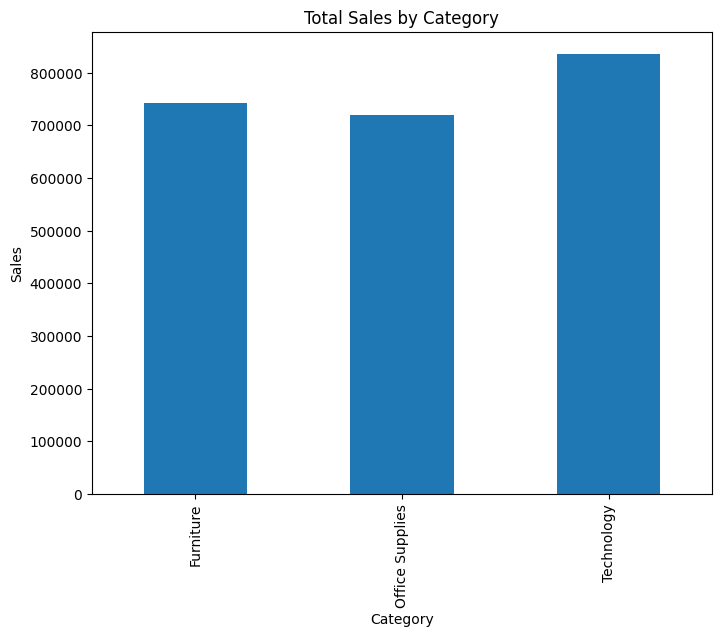

In [18]:
# Step 9: Visualizations
# Sales by Category
plt.figure(figsize=(8,6))
df.groupby("Category")["Sales"].sum().plot(kind="bar")
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

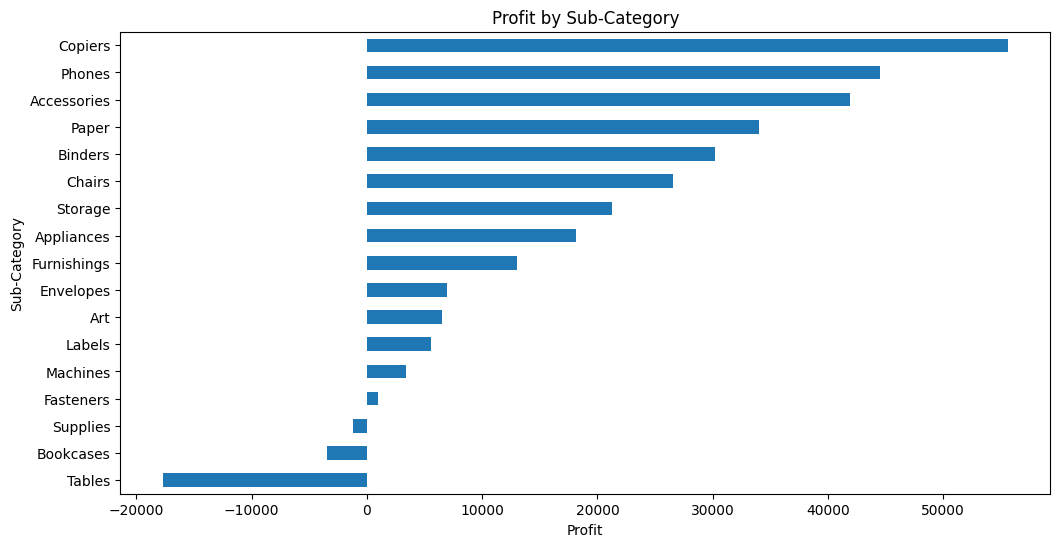

In [19]:
# Profit by Sub-Category
plt.figure(figsize=(12,6))
df.groupby("Sub-Category")["Profit"].sum().sort_values().plot(kind="barh")
plt.title("Profit by Sub-Category")
plt.xlabel("Profit")
plt.show()


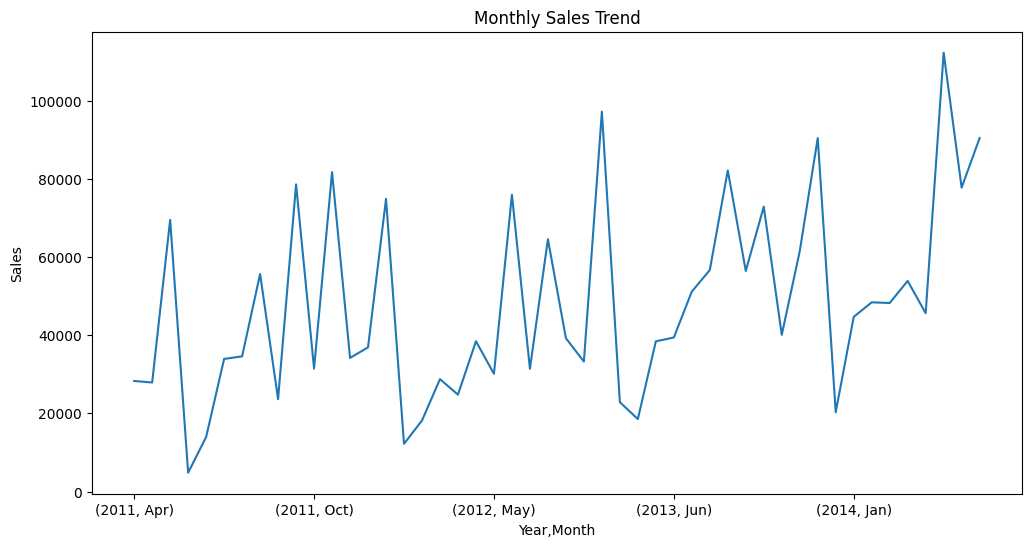

In [20]:
# Sales Trend (by Month-Year)
plt.figure(figsize=(12,6))
monthly_sales = df.groupby(["Year","Month"])["Sales"].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

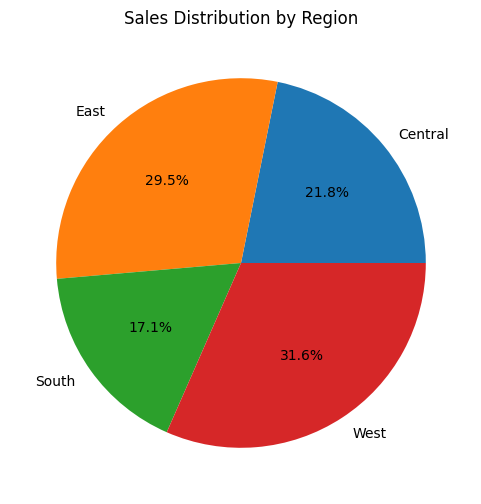

In [21]:
# Sales by Region (Pie chart)
plt.figure(figsize=(6,6))
df.groupby("Region")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()